In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
engine.execute(text('SELECT * FROM Measurement LIMIT 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
engine.execute(text('SELECT * FROM Station LIMIT 5')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
# Calculate the date one year ago from the most recent date in the database
most_recent_date = dt.datetime.strptime('2017-08-23', '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=366)

# Query the precipitation data for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Load the data into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Drop rows with null (NaN) values in the 'Precipitation' column
precipitation_df = precipitation_df.dropna(subset=['Precipitation'])

precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [14]:
# Save the Pandas DataFrame to a CSV file
precipitation_df.to_csv('Resources/One_Year_precipitation_data.csv', index=False)

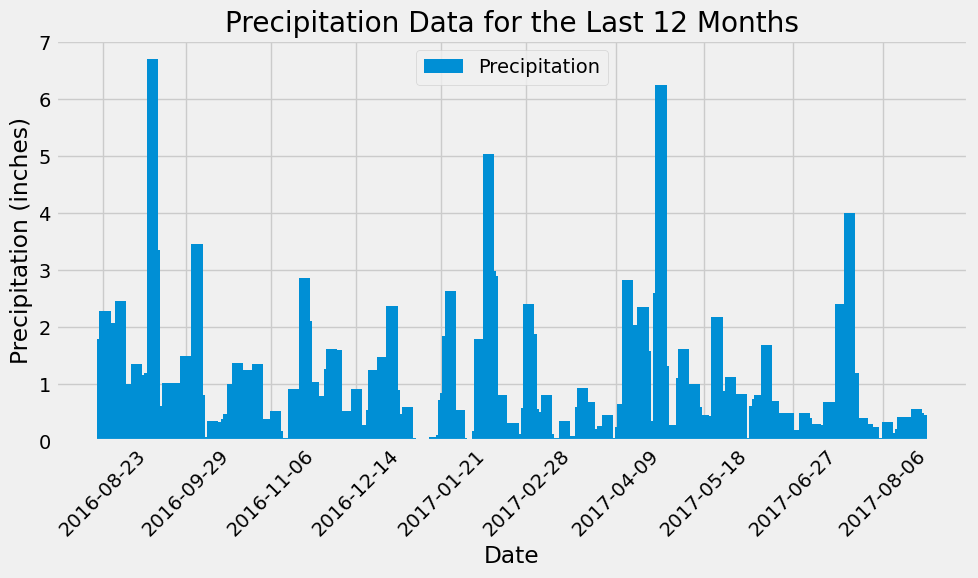

In [15]:
# Load the data into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by the 'Date' column to ensure chronological order
precipitation_df.sort_values(by='Date', inplace=True)

# Plot the precipitation data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=5, label='Precipitation')
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data for the Last 12 Months")

# Customize x-axis labels to display every 2 months (approximately)
date_labels = precipitation_df['Date'][::240]  # I had to use 240 to adjust it for every 60 days)
plt.xticks(date_labels, rotation=45)

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data


In [17]:
# Calculate summary statistics for the 'Precipitation' column
precipitation_summary = precipitation_df['Precipitation'].describe()

# Display the summary statistics
print(precipitation_summary)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Display the total number of stations
print(f'Total number of stations in the dataset: {total_stations}')


Total number of stations in the dataset: 9


In [20]:
# Design a query to find the most active stations and list them in descending order
station_activity = session.query(Measurement.station, func.count(Measurement.station).label('station_count')) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()

# Display the stations and their counts
for station, count in station_activity:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [22]:
# Determine the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .first()

# Extract the station ID of the most active station
most_active_station_id = most_active_station[0]


# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == most_active_station_id) \
    .all()

# Extract the results
lowest_temperature = temperature_stats[0][0]
highest_temperature = temperature_stats[0][1]
average_temperature = temperature_stats[0][2]

# Display the results
print(f"For Station {most_active_station_id}:")
print(f"Lowest Temperature: {lowest_temperature}°F")
print(f"Highest Temperature: {highest_temperature}°F")
print(f"Average Temperature: {average_temperature:.2f}°F")


For Station USC00519281:
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


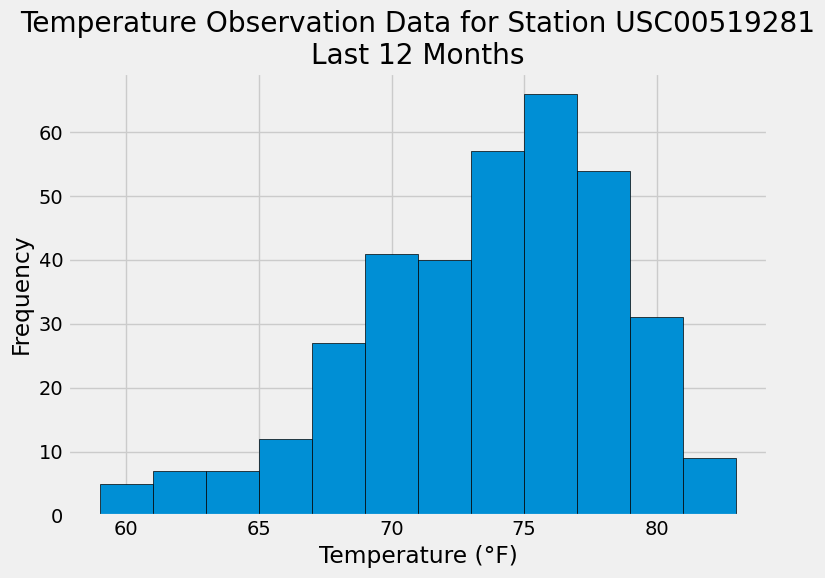

In [24]:
# Determine the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .first()

# Extract the station id of the most active station
most_active_station_id = most_active_station[0]

# Calculate the date one year ago from the last data point for the most active station
most_recent_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))) \
    .filter(Measurement.station == most_active_station_id) \
    .scalar()
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the temperature observations for the last 12 months for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago) \
    .all()

# Load the data into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the temperature data as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title(f"Temperature Observation Data for Station {most_active_station_id}\nLast 12 Months")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close Session

In [25]:
# Close Session
session.close()